<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [67]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [68]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [69]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

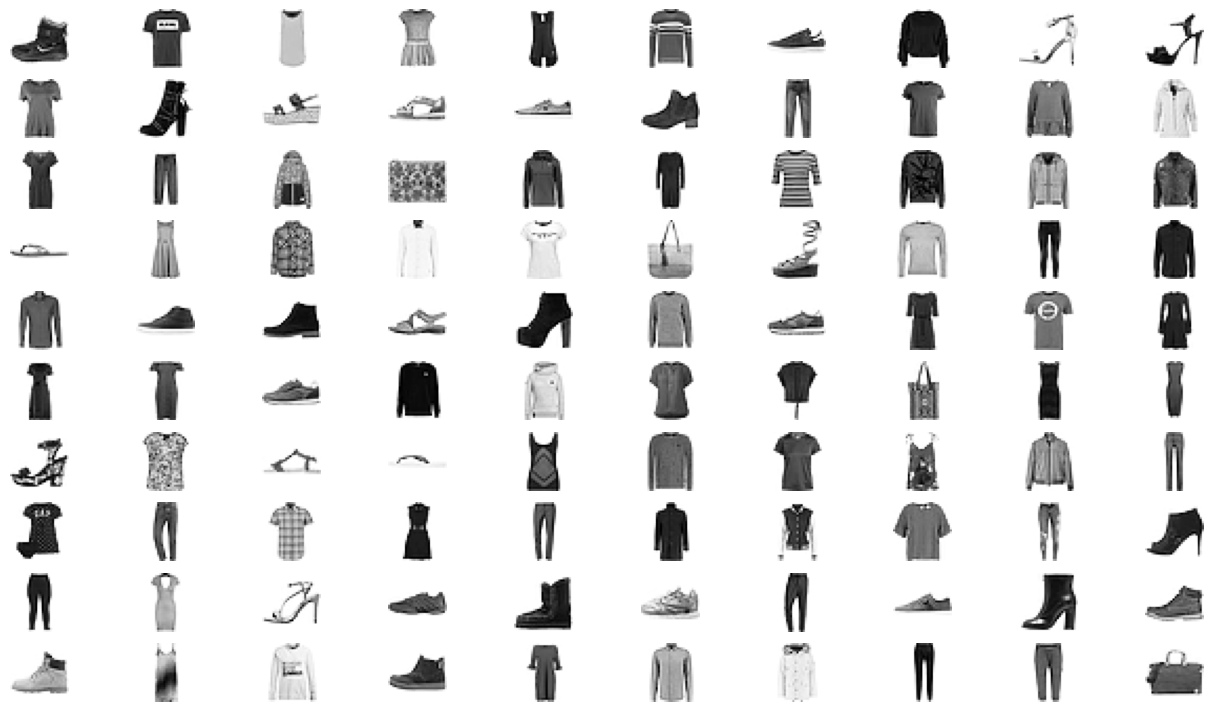

In [70]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

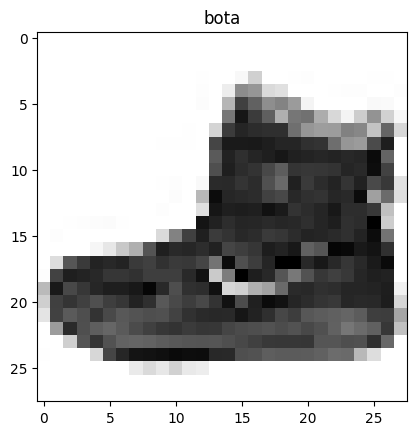

In [71]:
# Alumno, dibuje la primera imagen y su correspondiente categoria
plt.imshow(data_X_train[0], cmap='Greys')
plt.title(category_list[data_y_train[0]])
plt.show()

In [72]:
data_X_test[0].shape

(28, 28)

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [73]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
print(data_X_train[0][14, :])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [74]:
# Alumno: Normalizar los datos entre 0 y 1
X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

In [75]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
print("Cantidad de datos en observación: ", X_train_norm.shape[0])

Cantidad de datos en observación:  60000


In [76]:
# Alumno: Imprimir la dimension de la imagen
print("Tamaño de imágen: ", X_train_norm[0].shape)

Tamaño de imágen:  (28, 28)


In [77]:
print(data_y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

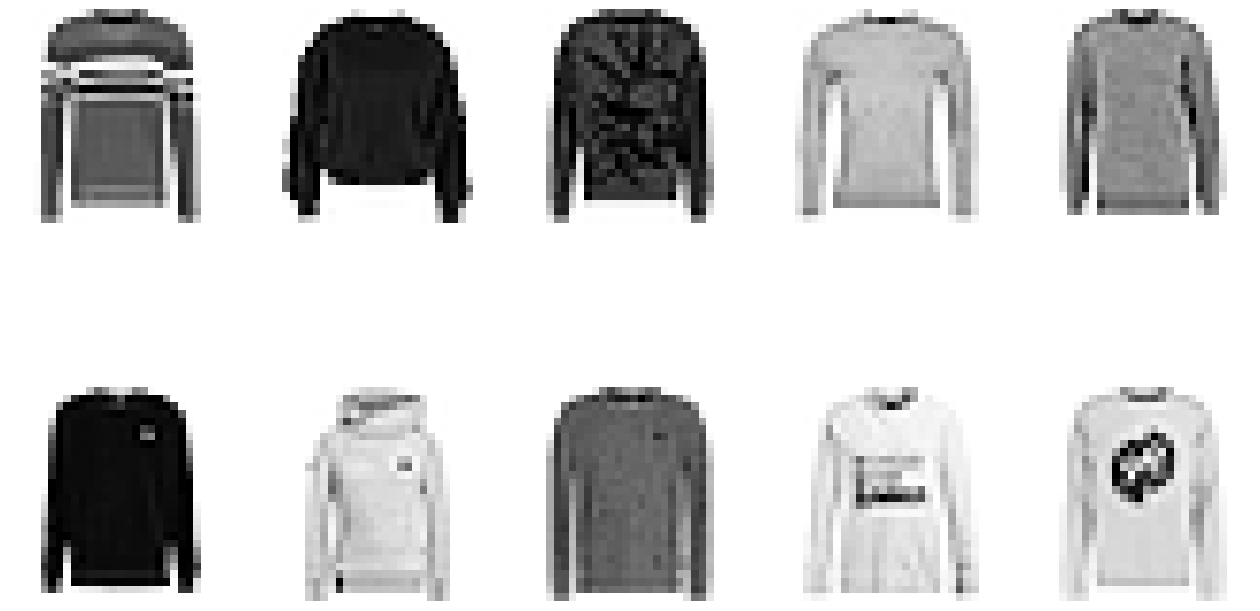

In [78]:
# Alumno: Explorar los primeros diez puloveres del dataset de train
fig = plt.figure(figsize=(16,9))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.axis('off')
    plt.imshow(X_train_norm[data_y_train == 2][i], cmap='Greys')
plt.show()

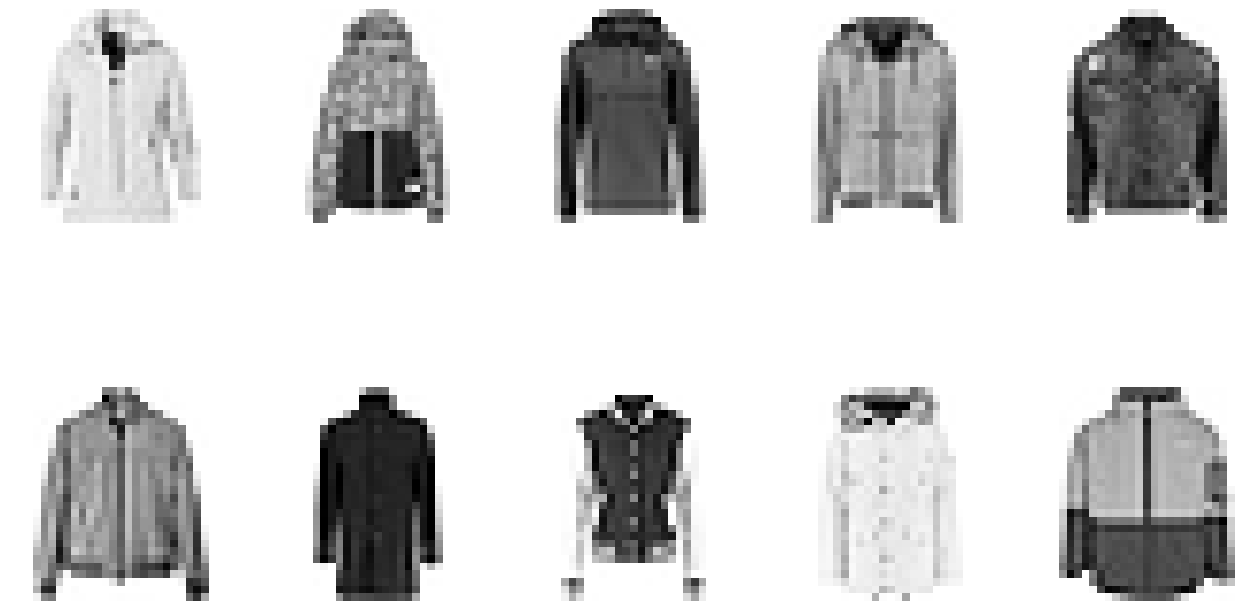

In [79]:
# Alumno: Explorar los primeros diez sacos del dataset de train
fig = plt.figure(figsize=(16,9))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.axis('off')
    plt.imshow(X_train_norm[data_y_train == 4][i], cmap='Greys')
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [80]:
data_X_train.shape

(60000, 28, 28)

In [81]:
# Alumno: Transformar el espacio de variable 28x28 a un vector de 784
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension
num_pixels = X_train_norm.shape[1] * X_train_norm.shape[2]

X_train = X_train_norm.reshape(X_train_norm.shape[0], num_pixels).astype('float32')
X_test = X_test_norm.reshape(X_test_norm.shape[0], num_pixels).astype('float32')

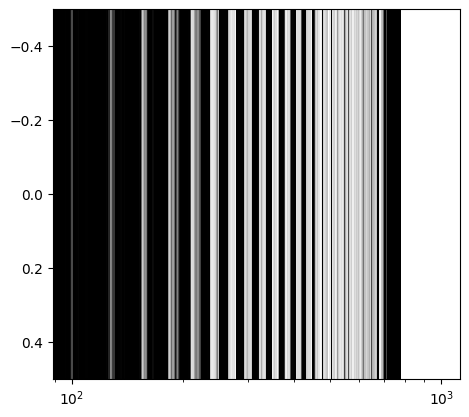

In [82]:
# Alumno: ¿Cómo se ve ahora nuestra primera imagen?
fig = plt.figure()
ax = fig.add_subplot()

ax.imshow(data_X_train[0].reshape(-1,1).T, cmap='gray')

ax.set_xscale("log")
plt.show()

Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [83]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [84]:
data_y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [85]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [86]:
# input shape
in_shape = X_train.shape[1]
in_shape

784

In [87]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [88]:
y_train.shape

(60000, 10)

In [89]:
from keras.layers import Dense, Dropout

# Alumno, crear un modelo con la cantidad de capas ocultas que crea
# mejor sin regularizacion
model = Sequential()
model.add(Dense(units=1024, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              803840    
                                                                 
 dense_15 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_16 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_17 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_18 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_19 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_20 (Dense)            (None, 10)               

In [90]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 5s 8ms/step - loss: 0.5569 - accuracy: 0.8000 - val_loss: 0.4478 - val_accuracy: 0.8457
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3977 - accuracy: 0.8578 - val_loss: 0.3965 - val_accuracy: 0.8615
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3481 - accuracy: 0.8735 - val_loss: 0.3616 - val_accuracy: 0.8707
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3305 - accuracy: 0.8808 - val_loss: 0.3515 - val_accuracy: 0.8731
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3144 - accuracy: 0.8865 - val_loss: 0.3413 - val_accuracy: 0.8830
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2995 - accuracy: 0.8915 - val_loss: 0.3481 - val_accuracy: 0.8818
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2886 - accuracy: 0.8954 - val_loss: 0.3392 - val_accuracy: 0.8807
Epoch 

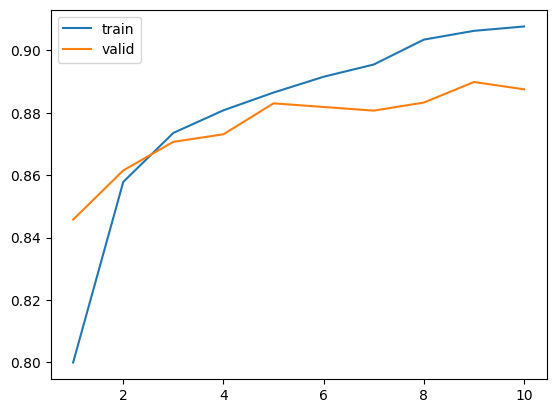

In [91]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [92]:
# Alumno: Tome el modelo anterior y agregue regularización
model = Sequential()

# Seleccione el dropout_ratev que mejor le funcione
dropout_rate = 0.2

model.add(Dense(units=1024, activation='relu', input_shape=(in_shape,)))

model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1024)              803840    
                                                                 
 dense_22 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_23 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_24 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_7 (Dropout)         (None, 1024)             

In [93]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 0.5746 - accuracy: 0.7908 - val_loss: 0.4304 - val_accuracy: 0.8467
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4062 - accuracy: 0.8543 - val_loss: 0.3807 - val_accuracy: 0.8668
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3667 - accuracy: 0.8673 - val_loss: 0.3894 - val_accuracy: 0.8623
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3415 - accuracy: 0.8769 - val_loss: 0.3639 - val_accuracy: 0.8692
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3229 - accuracy: 0.8838 - val_loss: 0.3572 - val_accuracy: 0.8678
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3101 - accuracy: 0.8889 - val_loss: 0.3488 - val_accuracy: 0.8782
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3074 - accuracy: 0.8892 - val_loss: 0.3726 - val_accuracy: 0.8662
Epoch 

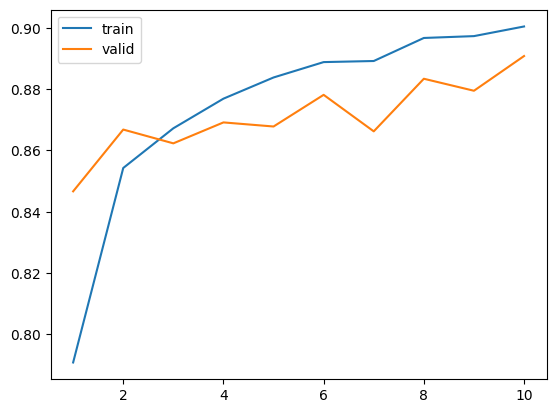

In [94]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [95]:
# Alumno: Predecir las probabilidades del dataset X_test
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

313/313 [==============================] - 1s 2ms/step


array([[9.3676187e-12, 9.9401466e-11, 1.4153216e-12, 8.9234869e-11,
        3.2845213e-11, 2.1256450e-04, 3.6512227e-10, 1.4661154e-03,
        5.9681843e-10, 9.9832135e-01],
       [3.9168113e-05, 1.3107549e-08, 9.9860126e-01, 4.3645564e-08,
        5.9382682e-04, 7.6835001e-13, 7.6576910e-04, 1.1077913e-14,
        2.1226443e-08, 1.9369868e-14],
       [4.1482720e-14, 1.0000000e+00, 1.4844128e-23, 7.5602866e-19,
        7.4783503e-23, 0.0000000e+00, 3.6154067e-18, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [96]:
# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(y_hat_prob, axis=1)
y_hat[:3]

array([9, 2, 1])

In [97]:
y_test[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [98]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.3596 - accuracy: 0.8820


0.8820000290870667

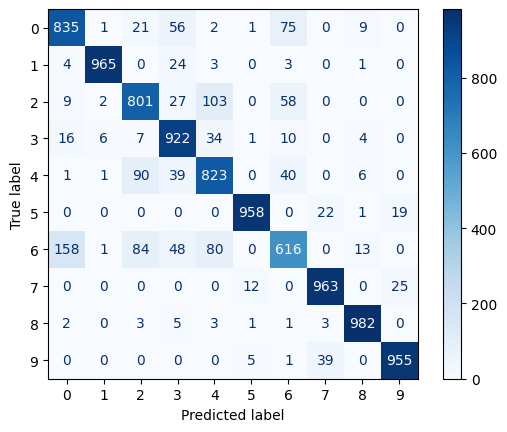

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [100]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [101]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco

X_test_sacos = X_test[rank_saco]
y_test_sacos = y_test[rank_saco]

In [102]:
# Alumno: Calcular la exactitud de los sacos seleccionados

score = model.evaluate(X_test_sacos, y_test_sacos)
score[1]

1/1 [==============================] - 0s 26ms/step - loss: 1.9702 - accuracy: 0.0000e+00


0.0

In [103]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)
y_hat_peores_s = model.predict(X_test_sacos)
y_hat_sacos = np.argmax(y_hat_peores_s, axis=1)
y_hat_sacos

1/1 [==============================] - 0s 18ms/step


array([2, 2, 2, 6, 2, 2, 2, 2, 2, 2])

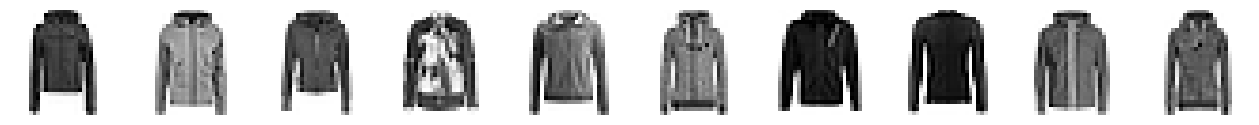

In [104]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría

fig = plt.figure(figsize=(16,9))
contador = 0
for i in rank_saco:
  ax = fig.add_subplot(1, 10, contador+1)
  ax.axis('off')
  ax.imshow(X_test_norm[i], cmap='Greys')
  contador += 1

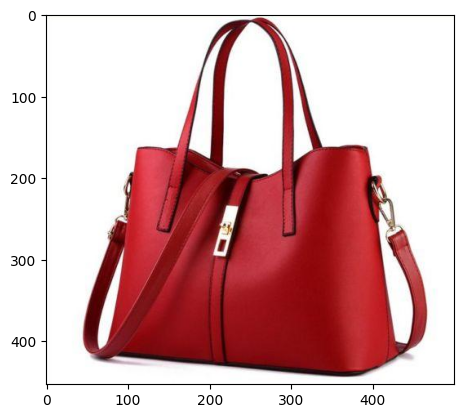

In [133]:
# PROBAR EL MODELO OFRECIENDOLE UNA IMAGEN DE UNA REMERA.

# Leer la imagen
img1 = mpimg.imread('cartera.jpg')

# Mostrar la imagen
plt.imshow(img1)
plt.show()

In [134]:
# Ver las dimensiones de la imagen cargada
img1.shape

(453, 500, 3)

In [135]:
# Función que extrae los canales de color
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Se invoca la función y se le pasa la imagen
gray = rgb2gray(img1)
gray.shape

(453, 500)

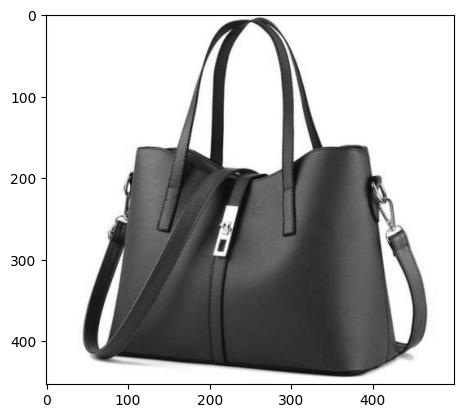

In [136]:
# cmap='gray', variación de colores en grises, indicando los valores máximo y mínimo de la escala de colores.
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

In [140]:
#Modificando las dimensiones de la imagen para que sea 28x28
copi_img = gray[:28,:28]
copi_img.shape

(28, 28)

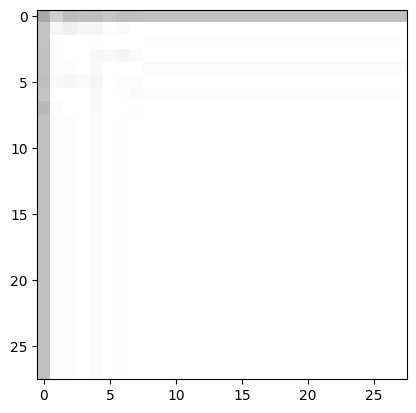

In [141]:
plt.imshow(copi_img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [142]:
# Preprocesar la imagen
# Normalizar
img_norm = copi_img / 255.0

# Calcular el número de pixeles de la imagen.
num_pixel = img_norm.shape[0] * img_norm.shape[1]
num_pixel

784

In [143]:
# Ajustar la imagen en una fila.
img_prueba = img_norm.reshape(1,num_pixel).astype('float32')
img_prueba.shape

(1, 784)

In [144]:
# ¿Qué es lo que el sistema ve?
# Predicción
prediccion = model.predict([img_prueba])
prediccion[0]

1/1 [==============================] - 0s 18ms/step


array([8.3437941e-09, 2.3526394e-21, 1.6102528e-10, 1.0391450e-15,
       3.3178842e-11, 4.6666457e-20, 3.1302449e-07, 3.3065511e-18,
       9.9999964e-01, 5.0569845e-20], dtype=float32)

In [145]:
# Muestra las clasificación de cada imagen, de acuerdo a la probabilidad más alta.
y_prediccion = np.argmax(prediccion,axis=1)
y_prediccion[0]

8

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning no es posible diferenciar bien entre los sacos y los puloveres, el modelo es incapaz de ver los botones o los cierres que son la clave para diferenciarlos. Una alternativa es probar con redes más aptas para detección de imagenes (las CNN convolucionales, que veremos más adelante)